# Changing Chart Types
### You can change chart types with the "kind" argument or the attribute for each chart

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
transactions = pd.read_csv("../data_visualization/transactions.csv", parse_dates=["date"])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: xlabel='store_nbr'>

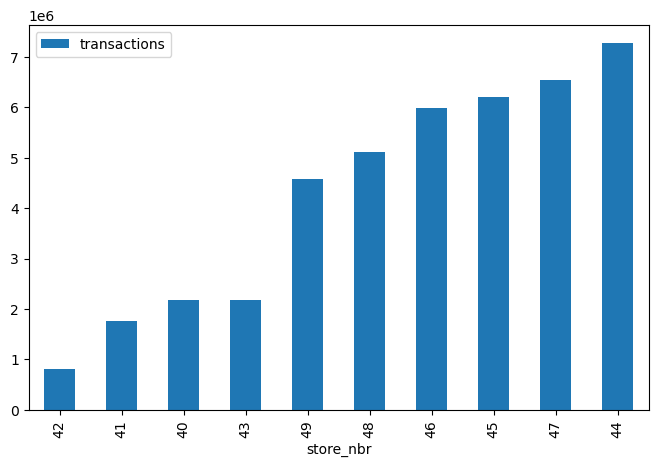

In [3]:
store_40 = list(range(40, 50))

(
transactions
 .query("store_nbr in @store_40")
 .groupby(["store_nbr"])
 .agg({"transactions": "sum"})
 .sort_values(by="transactions")
 .plot.bar(figsize=(8,5))
)

# Grouped and Stacked Bar Charts
### Plotting multiple series with a bar plot will create a grouped bar chart

In [7]:
store_40 = list(range(40, 50))

(
transactions
 .query("store_nbr in @store_40 and date.dt.month in [1, 2, 3]")
 .pivot_table(index=transactions["date"].dt.month,
              columns=transactions["store_nbr"],
              values="transactions",
              aggfunc="sum")
 #.groupby(["store_nbr"])
 #.agg({"transactions": "sum"})
 #.sort_values(by="transactions")
 #.plot.bar(figsize=(8,5))
)

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


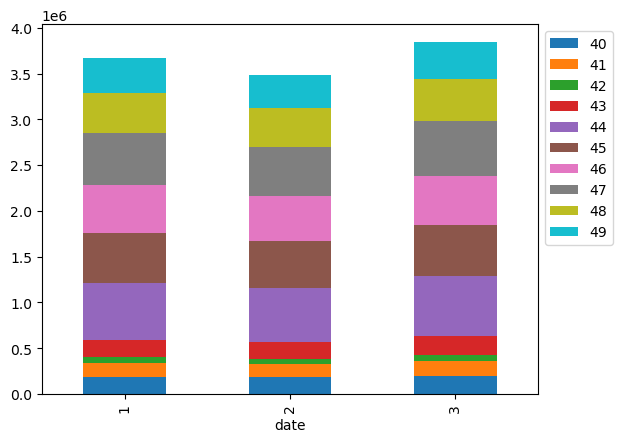

In [12]:
(
transactions
 .query("store_nbr in @store_40 and date.dt.month in [1, 2, 3]")
 .pivot_table(index=transactions["date"].dt.month,
              columns=transactions["store_nbr"],
              values="transactions",
              aggfunc="sum")
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1));

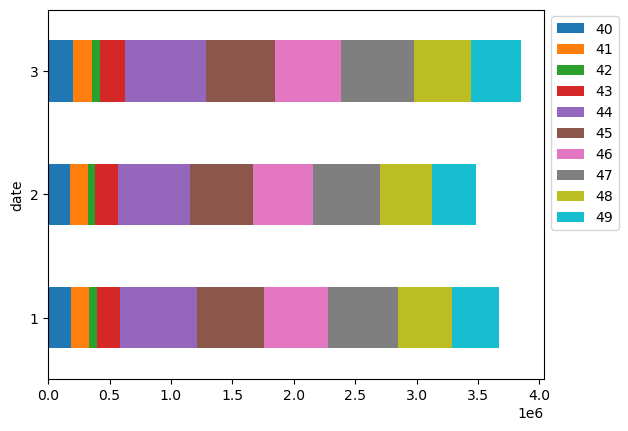

In [13]:
(
transactions
 .query("store_nbr in @store_40 and date.dt.month in [1, 2, 3]")
 .pivot_table(index=transactions["date"].dt.month,
              columns=transactions["store_nbr"],
              values="transactions",
              aggfunc="sum")
).plot.barh(stacked=True).legend(bbox_to_anchor=(1, 1))

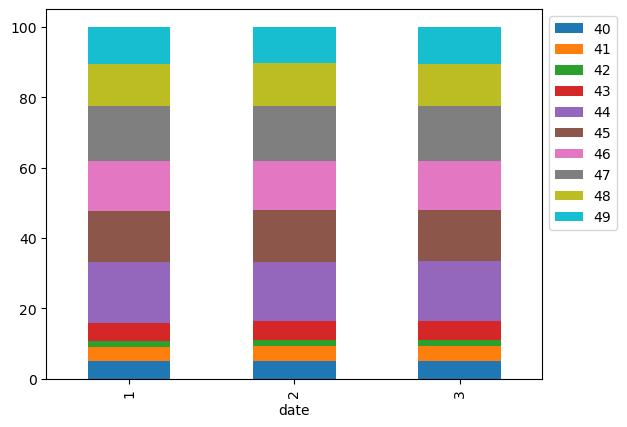

In [17]:
(
transactions
 .query("store_nbr in @store_40 and date.dt.month in [1, 2, 3]")
 .pivot_table(index=transactions["date"].dt.month,
              columns=transactions["store_nbr"],
              values="transactions",
              aggfunc="sum").apply(lambda x: x * 100 / sum(x), axis=1)
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))